# Линейная алгебра. Лабораторная работа 1, осень 2022


В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [2]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [ ]:
a = np.zeros((3, 4))
print(a)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
b = np.diag([1, 2, 3, 4, 5])
print(b)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [9]:
np.trace(b)

15

In [ ]:
np.linalg.inv(b)

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.2       ]])

In [11]:
x = np.random.rand(4, 5)
print(x)

[[0.0298856  0.70604743 0.74497334 0.98616984 0.25709139]
 [0.57068344 0.02059477 0.98616291 0.51417977 0.98000113]
 [0.48282088 0.81316383 0.51344351 0.19960345 0.72371047]
 [0.23417277 0.21225734 0.35660755 0.52334608 0.73104682]]


In [12]:
rows = [1,2]
columns = [0,1]
y = x[np.ix_(rows, columns)]
np.linalg.det(y)

0.45411555075615145

In [13]:
np.dot(x.T, x)

array([[0.61452563, 0.47517111, 0.91645985, 0.54183227, 1.08756754],
       [0.47517111, 1.20521572, 1.03950258, 0.98026645, 0.94536685],
       [0.91645985, 1.03950258, 1.91829575, 1.53084952, 1.79024826],
       [0.54183227, 0.98026645, 1.53084952, 1.55064444, 1.28447813],
       [1.08756754, 0.94536685, 1.79024826, 1.28447813, 2.0846845 ]])

## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [14]:
from copy import copy
def my_det(Y):
    X = Y.copy()
    a = 1
    c = 1
    row = len(X)
    column = len(X[0])
    if row != column:
        raise ValueError
    for i in range(row - 1):
        if abs(X[i][i]) < 1e-10:
          for j in range(i + 1, row):
              if abs(X[j][i]) >= 1e-10:
                  X[i], X[j] = X[j].copy(), X[i].copy()
                  a = -a
                  break
        if abs(X[i][i]) >= 1e-10:
            for k in range(i + 1, row):
              if abs(X[k][i]) >= 1e-10:
                  o = X[k][i].copy()
                  for w in range(i, row):
                      X[k][w] = X[k][w].copy() * X[i][i].copy() - o * X[i][w].copy()
                  X[k][i] = 0
                  c = c * X[i][i]
    det = a 
    for e in range(row):
      det = det * X[e][e]
    det= (1e+20 * det)/(1e+20 * c)
    return det

Простая проверка:

In [15]:
# Запустите этот блок кода
X = np.array([[1,0,0], [0,0,1], [0,1,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [17]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

12.7 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
978 µs ± 177 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
124 µs ± 2.06 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


138 ms ± 831 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
22.9 ms ± 625 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
12.4 s ± 462 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


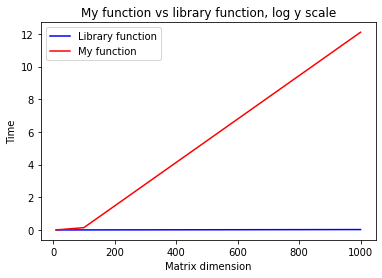

In [31]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

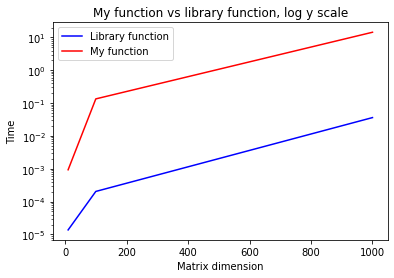

In [ ]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [ ]:
x1 = np.array([[1, 0], [10 ** 20, 1]])
y1 = np.array([[10 ** (-20), 1], [0, 1 - 10 ** 20]])
x2 = np.array([[1., 0.], [10.**20, 1.]])
y2 = np.array([[10.**(-20), 1.], [0., 1. - 10. ** 20]])
print(np.dot(x1, y1))
print(np.dot(x2, y2))

[[1e-20 1]
 [1.0 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


И какой из них правильный?

---
Проведя рассчёты самостоятельно, можно убедиться, что 1 вариант(с целыми числами) работает корректно, а вариант с числами с плавающей точкой - нет(последний элемент неверный). Это происходит из-за некорректного округления.

**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [19]:
def my_pascal(dim):
    P = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(dim):
            if i == 0:
                P[j][i] = 1
            else:
                if j == 0:
                    P[j][i] = 1
                else:
                    P[j][i] = P[j][i - 1] + P[j-1][i]
    return P
print(my_pascal(5))

[[ 1.  1.  1.  1.  1.]
 [ 1.  2.  3.  4.  5.]
 [ 1.  3.  6. 10. 15.]
 [ 1.  4. 10. 20. 35.]
 [ 1.  5. 15. 35. 70.]]


Чему равен её определитель? **Строго** поясните свой ответ.

$ L = \left( \begin{matrix} 1 & 0 & ... & 0 \\ 1 & 1 & ... & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 1 & \binom{n-1}{2} & ... & \binom{n-1}{n-1} \end{matrix} \right)$
$U = L^{T}$.
\\
Докажем, что $L * U = S$, где S - это матрица паскаля соответсвующего размера($n*n$).
\\
Действительно, $S_i_j = L_i * S_j$, Значит $S_i_j = L_i * (L_j)^{T}$
\\
Тогда $S_i_j = L_i_1 * L_j_1 + L_i_2 * L_j_2 + \dots\ + L_i_n * L_j_n$,
\\
$S_i_j = \binom{i}{0} * \binom{j}{0} + \binom{i}{1}*\binom{j}{1} + \dots\ + \binom{i}{n-1} *\binom{j}{n-1}$.
\\
Теперь комбинаторно докажем, что это $\binom{i+j}{i}$.(Тем самым мы докажем, что данная матрица - матрица паскаля).
\\
Заметим, что $\binom{i + j}{i}$ это кол-во путей из точки (0,0) в точку (i,j),$i>=0, j >= 0$, если мы можем двигаться только вправо и вверх.
\\
Разобьем путь на два этапа - на первом i шагов, на втором j. Выбрав k шагов вверх на первом этапе мы должны будем выбрать ещё j - k шагов вверх на втором. Очевидно выбрав все k от 1 до i мы получим все возможные пути, а их кол-во - $\binom{i}{1} * \binom{j}{j-1} + \binom{i}{2} * \binom{j}{j-2} + \dots\ + \binom{i}{i} * \binom{j}{j-i}$ = $\binom{i}{0} * \binom{j}{0} + \binom{i}{1}*\binom{j}{1} + \dots\ + \binom{i}{n-1} *\binom{j}{n-1}$, ч.т.д.
\\
Значит $S = L*U$, значит $det(S) = det(L) * det(U) = 1$.




**Ваше решение**

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [21]:
np.linalg.det(my_pascal(30))

-3.400444993542791e+51

Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [22]:
# Your code here
def prod_and_sq_sum(A):
    b = np.diag(A)
    a = np.diag(b)
    c = np.dot(a, a)
    print(np.prod(b))
    print(sum(np.diag(c)))
X = np.array([[2,1,1], [1,3,1], [1,1,1]])
prod_and_sq_sum(X)


6
14


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [ ]:
# Your code here
def f(A,B,lmbd,k):
    x = A*lmbd.reshape((1,A.shape[1]))
    return x[:,:min(A.shape[1],k)].dot(B[:,:min(B.shape[1],k)].T)


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [23]:
# Your code here
def get_diag(A, B):
    C = B.T
    E = A*C 
    return(E.sum(axis = 1))

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [48]:
import math
def shrink_rotate(x, a, coef=1., angle=0.):
    return((x-a) * coef*np.exp(angle * 1j) + a)
    raise NotImplementedError()
print(shrink_rotate(1.0 + 0 * 1j, 0.0 + 0 * 1j, 2.0, 2 + 0 * 1j))
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    s = a + np.conj((x-a) * coef*np.exp(angle * 1j))
    return(s)
    raise NotImplementedError()
print(shrink_rotate_conj(1.0 + 0 * 1j, 0.0 + 0 * 1j, 2.0, 2 + 0 * 1j))
def geometric_inverse(x, a, r):
    coef = r**2/((x-a) * np.conj(x-a))
    return((x-a) * coef + a)
    raise NotImplementedError()
print(geometric_inverse(1, 0, 2))

(-0.8322936730942848+1.8185948536513634j)
(-0.8322936730942848-1.8185948536513634j)
4.0


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

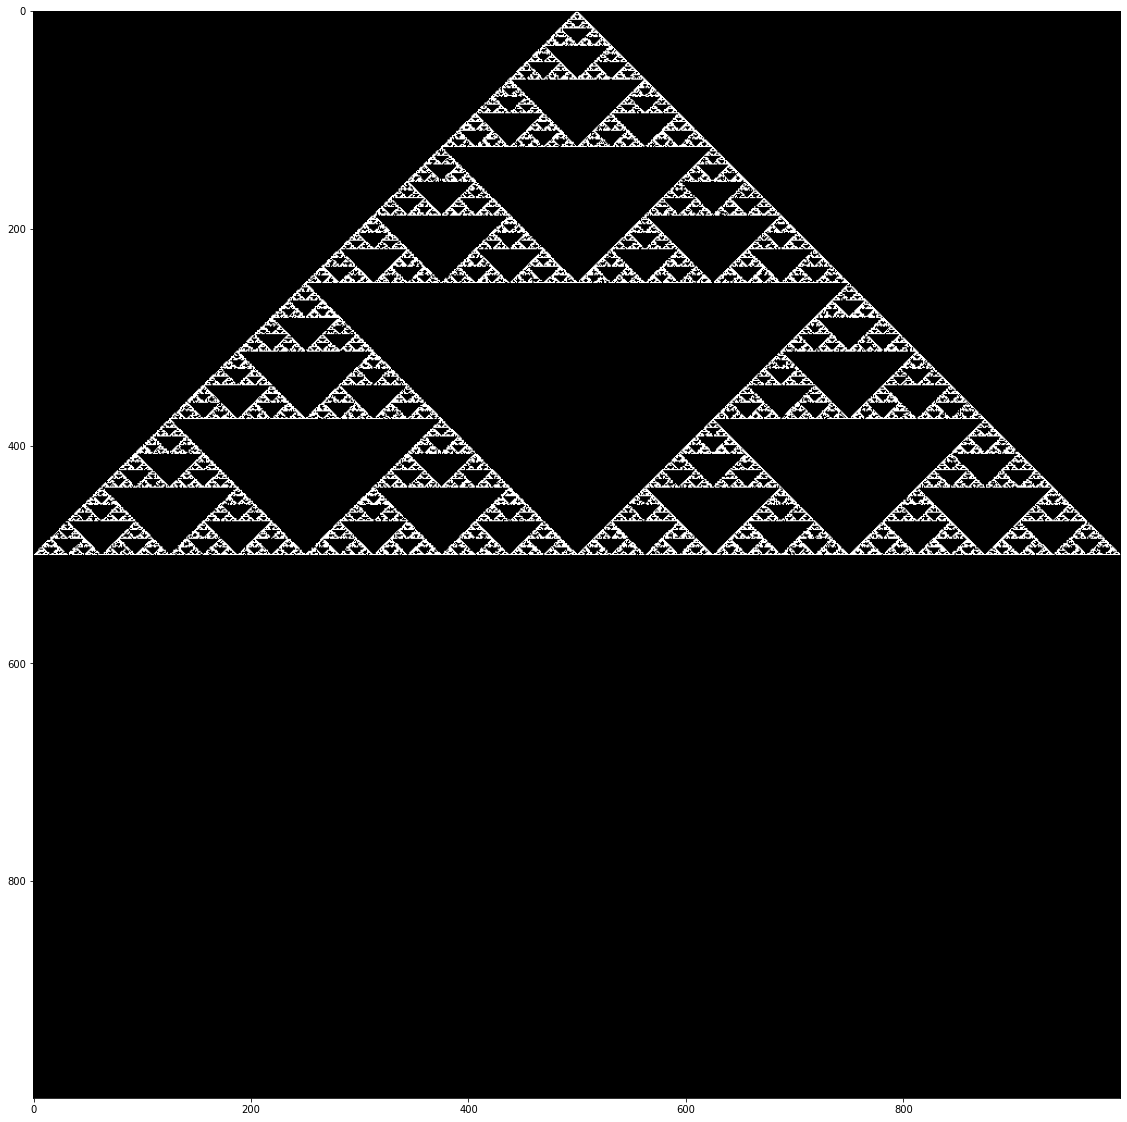

In [24]:
# Your code here
z = 0.5 + 0.*1j
arr1 = np.zeros((1000, 1000))
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    b = (int((z.real) * 1000)//2 + 500)
    a = (int((z.imag) * 1000)//2 + 500) * -1
    arr1[a,b] = 1
plt.figure(figsize = (20,20))
im = plt.imshow(arr1, cmap = 'gray')
plt.show()

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение
По сути изначально выбирается случайная точка, затем выбирается случайная вершина исходного треугольника, отмечается середина отрезка соединяющего вершину и точку, затем с полученной точкой производят такое же преобразование.
Таким образом, не может быть получена ни одна точка из серединного треугольника, т.к ни для одной точки внутри треугольника точки из серединного треугольника не могут являтся серединой отрезка, соединяющего точку с вершиной трегольника(это легко видно геометрически, т.к серединный треугольник ограничен средними линиями, а сделав гомотетию в любой вершине с коэфом 2 средняя линия переходит в строну исходного треугольника, значит внутренность переходит во вне)

**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

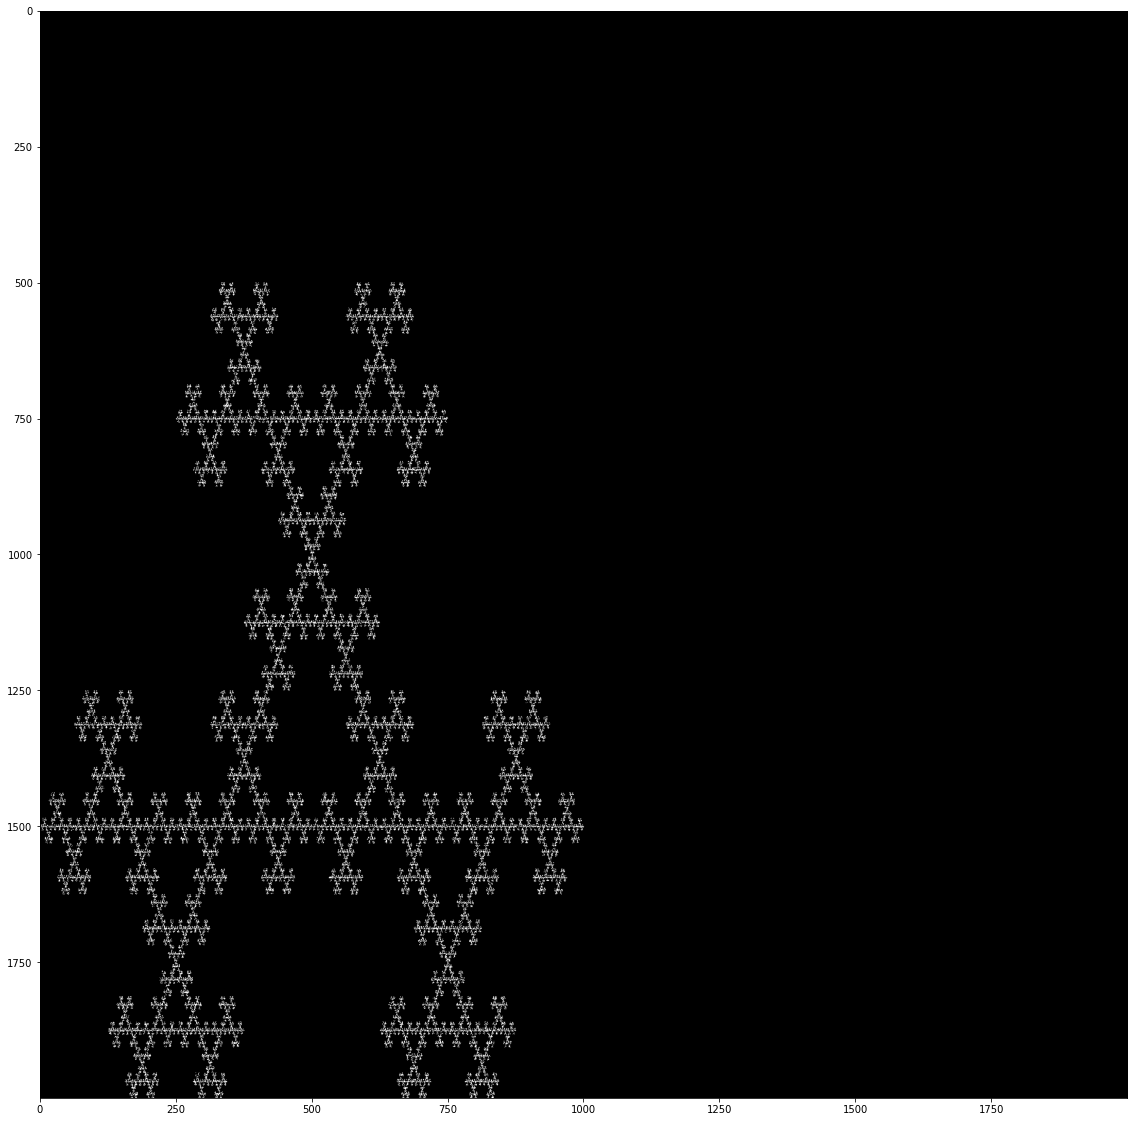

In [61]:
# Your code here
z = 0.5 + 0.*1j
arr1 = np.zeros((2000, 2000))
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate_conj(t, 0. + 1.*1j, coef=0.5, angle=0)),
    (lambda t: shrink_rotate_conj(t, 1. + 0.*1j, coef=0.5, angle=0)),
    (lambda t: shrink_rotate_conj(t, -1. + 0.*1j, coef=0.5, angle=0))
    
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    b = (int((z.real) * 1000)//2 + 500)
    a = (int((z.imag) * 1000)//2 + 500) * -1
    arr1[a,b] = 1
plt.figure(figsize = (20,20))
im = plt.imshow(arr1, cmap = 'gray')
plt.show()

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

15.4 µs ± 709 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
15.4 µs ± 3.76 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
73.9 µs ± 989 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
48 µs ± 930 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
263 µs ± 6.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
142 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
1.3 ms ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
595 µs ± 8.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
13.3 ms ± 333 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.89 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
93.2 ms ± 19.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.6 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


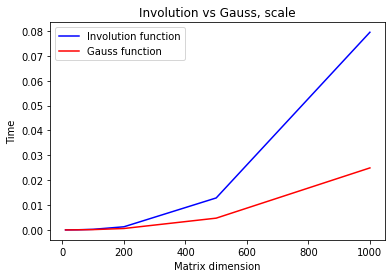

In [30]:
# Your code here
def involution(A,B):
    C = np.linalg.inv(A)
    E = np.dot(C, B)
inv_times = []
gauss_times = []
x1 = [10]
x2 = [10, 50, 100, 200, 500, 1000]
for i in x2:
    A = np.random.rand(i, i)
    B = np.random.rand(i, 10)
    res_inv = %timeit -o involution(A, B)
    inv_times.append(res_inv.best)
    res_gauss = %timeit -o np.linalg.solve(A, B)
    gauss_times.append(res_gauss.best)    

plt.plot(x2, inv_times, color='blue', label='Involution function')
plt.plot(x2, gauss_times, color='red', label='Gauss function')
plt.title('Involution vs Gauss, scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()
    


269 µs ± 9.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
157 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
341 µs ± 8.97 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
249 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
588 µs ± 5.14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
770 µs ± 7.76 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
889 µs ± 8.87 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.37 ms ± 16.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.44 ms ± 9.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.6 ms ± 69.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.28 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.05 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.38 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.7 ms ± 321 µs per loop (mean ± std. dev. of 7 runs, 100 loops 

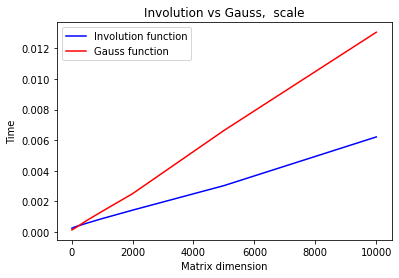

In [29]:
def involution(A,B):
    C = np.linalg.inv(A)
    E = np.dot(C, B)
inv_times = []
gauss_times = []
x1 = [100]
x2 = [10, 100, 500, 1000, 2000, 5000, 10000]
for i in x2:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, i)
    res_inv = %timeit -o involution(A, B)
    inv_times.append(res_inv.best)
    res_gauss = %timeit -o np.linalg.solve(A, B)
    gauss_times.append(res_gauss.best)    

plt.plot(x2, inv_times, color='blue', label='Involution function')
plt.plot(x2, gauss_times, color='red', label='Gauss function')
plt.title('Involution vs Gauss,  scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Внимательно посмотрев на графики, можно заметить, что при увеличении n, при фиксированном количестве правых частей, метод гаусса выигрывает во времени, а при увеличении кол-ва правых частей при фиксированном m во времени выигрывает метод умножения на обратную(involution). Чтобы пояснить эти результаты посчитаем кол-во элементарных операций в зависимости от m и n для каждого из способов:
\
Метод Гаусса:
При решении системы методом гаусса мы приводим к ступенчатому виду матрицу (A|B). При этом производится следующий алгоритм: Делим n-ую строку на скаляр, вычитаем ее из всех последующих. Итого это (n+m - t) операций деления, где t - номер ведущего элемента.Затем вычитаем ее из (n-t) строк. Каждое вычитание - (n + m - t) операций вычитания. Итого - (n - t+1)(n+m-t) операций для t-ой строки. Строк - n. Это сумма по t от 0 до n.членов вида (n - t + 1)(n+m-t) = n^2 + n*m. Оставшуюся часть отбросим - она несущественна. Итого примерно n^3 + n^2*m.
\
Метод инволюции:
При нахождении обратной нужно примерно n^3 операций(по аналогии с методом гаусса). При домножении на матрицу n*m нужно ещё n^2 *m операций (для каждого столбца выбрать строку и провести , операций).
Итого данные методы работают примерно одинаковое количество операций, НО операция деления работает дольше, чем операция умножения, и именно из-за этого при возрастающем n, метод гаусса начинает выигрывать во времени, а при возрастающем m уже метод инволюции начинает выигрывать в скорости(n + m возрастает по m, поэтому для метода гаусса кол-во делений растет, а для метода инволюции - нет(обращаем ту же самую матрицу)).